<a href="https://colab.research.google.com/github/I-SER-I/CV/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%D0%9A%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рубежная контрольная работа

Эту работу выполнять не обязательно. Баллы набранные за работу просуммируются с баллами, которые были набраны за контрольную работу 1 и выставлены как оценка за промежуточную аттестацию "автоматом". 

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 263861 # по умолчанию вписан мой номер

2020-12-21 15:15:46.436651


#  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

# Общее задание

Нужно решить задачу бинарной классификации, предварительно построив признаковое описание объектов на основе нескольких таблиц. 

Целевая переменная - пол клиента.

В качестве модели нужно использовать нейронную сеть, которую нужно строить с помощью `keras` или `torch` на выбор студента.

In [ ]:
!wget https://www.dropbox.com/s/ipj9x7yxts23t00/gender_train.csv
!wget https://www.dropbox.com/s/d0tesyvostk8lvj/tr_mcc_codes.csv
!wget https://www.dropbox.com/s/vfgqxzu11mbadhv/transactions.csv

--2020-12-21 15:15:59--  https://www.dropbox.com/s/ipj9x7yxts23t00/gender_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ipj9x7yxts23t00/gender_train.csv [following]
--2020-12-21 15:15:59--  https://www.dropbox.com/s/raw/ipj9x7yxts23t00/gender_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbd74e926b9fd4a68e5c91de3e9.dl.dropboxusercontent.com/cd/0/inline/BFfilyXYwBnjlqsotYReVDcHhiQDjsD1SOqXMQUadqJuI1-WF_DH8VtJeDbu06rQXqAiB-e3bNOb1NEviyAwYN4HDmlvKL3HJ67csKmt_gpKQfLVaWajsXD5C8tT9IB3kck/file# [following]
--2020-12-21 15:15:59--  https://ucbd74e926b9fd4a68e5c91de3e9.dl.dropboxusercontent.com/cd/0/inline/BFfilyXYwBnjlqsotYReVDcHhiQDjsD1SOqXMQUadqJuI1-WF_DH8VtJeDbu06rQXqAiB-e3bNOb1NEviyAwYN4HDmlvKL3HJ67

# Данные

Для всех последующих заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **transactions, tr_mcc_codes и gender_train** из одноимённых таблиц из папки data. Для таблицы transactions используйте только первые n=1000000 строк.

Эти данные уже использовались в работе 2. Описание данных тут: https://drive.google.com/file/d/13sn8orjkoGfO1SVZYByXNmZQYFRfmOdp/view?usp=sharing

Скачать данные отсюда: https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L?usp=sharing

## Задание 1

В задании требуется на основе нескольких таблиц с данными сделать признаковое описание объектов. 

Объектами являются клиенты. Клиенты идентифицируются с помощью `customer_id`, которые есть в таблицах **transactions** и **gender_train**. В качестве призаков нужно использовать даннее по категориям транзаций: ```mcc_code``` — mcc-код транзакции есть в таблицах **transactions** и **tr_mcc_codes**


Для выбора варианта, запустите код в следующей ячейке



In [ ]:
print ('Список категорий')
feature_list = ['Одежда (также нужно искать "одежды")', 'Аптеки', 'Ценные бумаги', 'Магазины косметики и Салоны красоты', 'Образовательные услуги (а также школы, университеты)',
                'Алименты', 'Прокат автомобилей', 'Автозапчасти, Автошины и Станции техобслуживания (а также СТО)', 'Видеоигры (искать надо по "видеоигр")',
                'Отели', 'Программирование', 'Ремонт', 'Предсказатели будущего', 'Ювелирные изделия']
if (int(str(v)[4]) % 2) == 0:
  print (feature_list[::2])
else:
  print (feature_list[::-2])


if (int(str(v)[5]) % 2) == 0:
  print ('В качестве значений признаков используйте количество транзакций с тратами и количество транзакций с поступлениями')
else: 
  print ('В качестве значений признаков используйте сумму по транзакциям с тратами и сумму по транзакциям с поступлениями')

Список категорий
['Одежда (также нужно искать "одежды")', 'Ценные бумаги', 'Образовательные услуги (а также школы, университеты)', 'Прокат автомобилей', 'Видеоигры (искать надо по "видеоигр")', 'Программирование', 'Предсказатели будущего']
В качестве значений признаков используйте сумму по транзакциям с тратами и сумму по транзакциям с поступлениями


Таким образом получится 14 признаков, то есть семь категорий, каждая из которых даст два значения: траты и поступления. Например, категория "Одежда" даёт признаки "Одежда траты" и "Одежда поступления".

Сделайте нормализацию значений признаков так, чтобы все означения менялись от 0 до 1. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [ ]:
tr_mcc_codes = pd.read_csv(filepath_or_buffer = "tr_mcc_codes.csv",
                          sep = ';')
transactions = pd.read_csv(filepath_or_buffer = "transactions.csv",
                          sep = ',',
                           nrows = 1000000)
gender_train = pd.read_csv(filepath_or_buffer = "gender_train.csv",
                          sep = ',')

In [ ]:
def get_cat(s):
  return tr_mcc_codes[tr_mcc_codes['mcc_description'].str.contains(s, case=False)]

all_mcc = get_cat('(одежд|ценные бумаги|образова|школ|университ|прокат авто|видеоигр|программирован|предсказатели будущего)')

cat_clothes = get_cat('одежд')
cat_paper = get_cat('ценные бумаги')
cat_edu = get_cat('(образова|школ|университ)')
cat_car = get_cat('прокат авто')
cat_games = get_cat('видеоигр')
cat_prog = get_cat('программирован')
cat_future = get_cat('предсказатели будущего')
all_mcc

arr = [cat_clothes, cat_paper, cat_edu, cat_car, cat_games, cat_prog, cat_future]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
transactions = transactions[transactions.mcc_code.isin(all_mcc['mcc_code'].to_list())]

In [ ]:
transactions["cat"] = "none"
i = 0
for item in arr:
  i += 1
  transactions.loc[transactions.mcc_code.isin(item['mcc_code'].to_list()), 'cat'] = i
  print(i)

1
2
3
4
5
6
7


In [ ]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,cat
828,39026145,372 08:45:27,5621,1010,-31442.82,097179,1
829,39026145,372 08:48:29,5621,1010,-11229.58,097179,1
1109,52220754,38 16:48:36,5691,1010,-68433.05,NaN,1
1307,52220754,142 08:37:33,5943,1110,-1482.30,NaN,3
1402,52220754,167 09:39:41,5943,1010,-2001.56,NaN,3
...,...,...,...,...,...,...,...
998285,8942066,436 00:00:00,5691,1110,-1437.39,SN271,1
999808,98801178,26 09:46:26,5641,1010,-30095.27,NaN,1
999840,98801178,100 00:00:00,5621,1110,-41549.44,NaN,1
999891,98801178,157 00:00:00,5641,1110,-27624.76,NaN,1


In [ ]:
transactions["amount_plus"] = transactions[transactions['amount'] >= 0]['amount']
transactions["amount_minus"] = transactions[transactions['amount'] < 0]['amount']

In [ ]:
z = transactions.merge(gender_train, on='customer_id').groupby(['customer_id', 'cat']).agg({'amount_plus': "sum", "amount_minus": "sum"})
z

amount_plus  amount_minus
customer_id cat                           
115617      1            0.0   -1576543.03
            3            0.0     -23469.82
117556      1            0.0     -15575.43
189257      1            0.0    -387672.92
293048      1            0.0    -313597.23
...                      ...           ...
99302313    1            0.0    -141492.70
99412328    1            0.0    -279405.40
99683064    1            0.0      -7636.11
99717689    1            0.0    -796199.60
99999680    1            0.0     -30319.86

[1011 rows x 2 columns]

In [ ]:
new_df = dict()

for row in z.iterrows():
  key = row[0]
  value = row[1]
  customer_id = key[0]
  cat = key[1]
  amount_plus = value['amount_plus']
  amount_minus = value['amount_minus']
  
  if customer_id not in new_df:
    new_df[customer_id] = {
        **{f'amount_plus_{i}': 0.0 for i in range(1, 8, 1)}, 
        **{f'amount_minus_{i}': 0.0 for i in range(1, 8, 1)}
    }

  new_df[customer_id][f'amount_plus_{cat}'] = amount_plus
  new_df[customer_id][f'amount_minus_{cat}'] = amount_minus

In [ ]:
df = pd.DataFrame.from_dict(new_df, orient='index')
df

,amount_plus_1,amount_plus_2,amount_plus_3,amount_plus_4,amount_plus_5,amount_plus_6,amount_plus_7,amount_minus_1,amount_minus_2,amount_minus_3,amount_minus_4,amount_minus_5,amount_minus_6,amount_minus_7
115617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1576543.03,0.0,-23469.82,0.0,0.0,0.0,0.0
117556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15575.43,0.0,0.00,0.0,0.0,0.0,0.0
189257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-387672.92,0.0,0.00,0.0,0.0,0.0,0.0
293048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-313597.23,0.0,0.00,0.0,0.0,0.0,0.0
361458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-291452.49,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-141492.70,0.0,0.00,0.0,0.0,0.0,0.0
99412328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-279405.40,0.0,0.00,0.0,0.0,0.0,0.0
99683064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7636.11,0.0,0.00,0.0,0.0,0.0,0.0
99717689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-796199.60,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
df.index = df.index.rename('customer_id')

In [ ]:
full_df = df.merge(gender_train, on='customer_id')

In [ ]:
full_df

,customer_id,amount_plus_1,amount_plus_2,amount_plus_3,amount_plus_4,amount_plus_5,amount_plus_6,amount_plus_7,amount_minus_1,amount_minus_2,amount_minus_3,amount_minus_4,amount_minus_5,amount_minus_6,amount_minus_7,gender
0,115617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1576543.03,0.0,-23469.82,0.0,0.0,0.0,0.0,1
1,117556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15575.43,0.0,0.00,0.0,0.0,0.0,0.0,0
2,189257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-387672.92,0.0,0.00,0.0,0.0,0.0,0.0,1
3,293048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-313597.23,0.0,0.00,0.0,0.0,0.0,0.0,0
4,361458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-291452.49,0.0,0.00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,99302313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-141492.70,0.0,0.00,0.0,0.0,0.0,0.0,1
720,99412328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-279405.40,0.0,0.00,0.0,0.0,0.0,0.0,0
721,99683064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7636.11,0.0,0.00,0.0,0.0,0.0,0.0,0
722,99717689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-796199.60,0.0,0.00,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
features = ['amount_plus_1', 'amount_plus_2', 'amount_plus_3',
       'amount_plus_4', 'amount_plus_5', 'amount_plus_6', 'amount_plus_7',
       'amount_minus_1', 'amount_minus_2', 'amount_minus_3', 'amount_minus_4',
       'amount_minus_5', 'amount_minus_6', 'amount_minus_7']
scaler = StandardScaler()

scaler.fit(full_df[features])
# X = scaler.transform(full_df[features])
X = full_df[features].values
y = full_df['gender']

In [ ]:
X.shape, y.shape

((724, 14), (724,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y)

# Задание 2

### Мои параметры
* количество эпох: 10000
* скорость обучения: 0.1
* функция активация: ReLU

In [ ]:
import torch

X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor) 

X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor) 

In [ ]:
len(train_ds), len(test_ds)

(651, 73)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=579, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=145)

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(14, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    # nn.Dropout(p=0.2),
    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    # nn.Dropout(p=0.2),
    nn.Linear(64, 2),
    # nn.Sigmoid()
)

# model.cuda()
model.train()

Sequential(
  (0): Linear(in_features=14, out_features=64, bias=True)
  (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
for p in model.parameters():
  p.requires_grad = True

In [ ]:
from torch.autograd import Variable
import torch.nn.functional as F


def compute_loss(X_batch, y_batch):
    X_batch = Variable(torch.FloatTensor(X_batch)).cuda()
    y_batch = Variable(torch.LongTensor(y_batch)).cuda()
    logits = model.cuda()(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

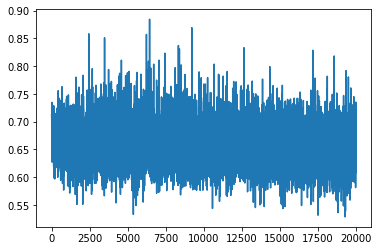

In [ ]:
EPOCHS = 10000
LR = 0.1

loss = nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=LR)

loss_values = []

for epoch in tqdm(range(EPOCHS)):
  
  for batch in train_loader:

    loss_val = compute_loss(batch[0], batch[1])
    loss_val.backward()

    opt.step()
    opt.zero_grad()

    loss_values.append(loss_val.detach().cpu().item())


plt.plot(loss_values)
plt.show()

# Задание 3


Проверить качество модели не менее чем на трёх разных метриках. Вывести эти значения.

После завершения контрольной работы, дайте ссылку на colab в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()

with torch.no_grad():
  for batch in test_loader:

      y_pred = model(batch[0].cuda())

      y_hat = torch.argmax(y_pred, dim=1).detach().cpu()
      
      print('Acc:', accuracy_score(y_hat, batch[1]))
      print(classification_report(y_hat, batch[1]))

Acc: 0.6027397260273972
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        61
           1       0.23      0.58      0.33        12

    accuracy                           0.60        73
   macro avg       0.55      0.59      0.52        73
weighted avg       0.77      0.60      0.65        73



In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2020-12-21 16:26:14.731897
